# ATLAS HIGGS BOSON ML
##### v.0.5.0

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NadiaLL/atlas-higgs-boson-ml/blob/master/atlas-higgs-boson-ml-v.0.5.0.ipynb)

![higgs_beitragsbild.jpg](higgs_beitragsbild.jpg)

## Outlinet

- [Abstract](#Abstract)
- [Dataset Semantics](#Dataset-semantics)
- [File Descriptions](#File-descriptions)
- [Step 1. Preliminary investigation](#Step-1.-Preliminary-investigation)
- [Step 2. Analysis](#Step-2.-Analysis)
- [Step 3. Preprocessing](#Step-3.-Preprocessing)
- [Step 4. Evaluation of several models](#Step-4.-Evaluation-of-several-models)
- [Logistic Regression](#Logistic-Regression)
- [Gradient Boosting](#Gradient-Boosting)
- [ANN Model](#ANN-Model)
- [References](#References)

## Abstract
The dataset has been built from official ATLAS full-detector simulation, with "Higgs to tautau" events mixed with different backgrounds. The simulator has two parts. In the first, random proton-proton collisions are simulated based on the knowledge that we have accumulated on particle physics. It reproduces the random microscopic explosions resulting from the proton-proton collisions. In the second part, the resulting particles are tracked through a virtual model of the detector. The process yields simulated events with properties that mimic the statistical properties of the real events with additional information on what has happened during the collision, before particles are measured in the detector.

The signal sample contains events in which Higgs bosons (with a fixed mass of 125 GeV) were produced. The background sample was generated by other known processes that can produce events with at least one electron or muon and a hadronic tau, mimicking the signal. For the sake of simplicity, only three background processes were retained for the Challenge. The first comes from the decay of the Z boson (with a mass of 91.2 GeV) into two taus. This decay produces events with a topology very similar to that produced by the decay of a Higgs. The second set contains events with a pair of top quarks, which can have a lepton and a hadronic tau among their decay. The third set involves the decay of the W boson, where one electron or muon and a hadronic tau can appear simultaneously only through imperfections of the particle identification procedure.

Due to the complexity of the simulation process, each simulated event has a weight that is proportional to the conditional density divided by the instrumental density used by the simulator (an importance-sampling flavour), and normalised for integrated luminosity such that, in any region, the sum of the weights of events falling in the region is an unbiased estimate of the expected number of events falling in the same region during a given fixed time interval. In our case, the weights correspond to the quantity of real data taken during the year 2012. The weights are an artifact of the way the simulation works and so they are not part of the input to the classifier. For the Challenge, weights have been provided in the training set so the AMS can be properly evaluated. Weights were not provided in the qualifying set since the weight distribution of the signal and background sets are very different and so they would give away the label immediately. However, in the opendata.cern.ch dataset, weights and labels have been provided for the complete dataset.

## Dataset semantics

| Variables     | Description                                                                                          |
| :------------ | :--------------------------------------------------------------------------------------------------- |
|**EventId**        | An unique integer identifier of the event.                                                           |
|**DER_mass_MMC**   | The estimated mass $m_H$ of the Higgs boson candidate, obtained through a probabilistic phase space integration.|
|**DER_mass_transverse_met_lep** | The transverse mass between the missing transverse energy and the lepton.|
|**DER_mass_vis** | The invariant mass of the hadronic tau and the lepton. |
|**DER_pt_h**	| The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector. |
|**DER_deltaeta_jet_jet** | The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num $\leq$ 1).|
|**DER_mass_jet_jet** | The invariant mass of the two jets (undefined if PRI_jet_num $\leq$ 1). |
|**DER_prodeta_jet_jet** | The product of the pseudorapidities of the two jets (undefined if PRI_jet_num $\leq$ 1). |
|**DER_deltar_tau_lep**	| The R separation between the hadronic tau and the lepton. |
|**DER_pt_tot**	| The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num $\leq$) and the subleading jet (if PRI jet num = 2) (but not of any additional jets). |
|**DER_sum_pt**	| The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num $\leq$ 1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3). |
|**DER_pt_ratio_lep_tau** | The ratio of the transverse momenta of the lepton and the hadronic tau. |
|**DER_met_phi_centrality**	| The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton. |
|**DER_lep_eta_centrality**	| The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num $\leq$ 1).|
|**PRI_tau_pt** | The transverse momentum $\sqrt{p_x^2 + p_y^2}$ of the hadronic tau. |
|**PRI_tau_eta** | The pseudorapidity $\eta$ of the hadronic tau.|
|**PRI_tau_phi** | The azimuth angle $\phi$ of the hadronic tau. |
|**PRI_lep_pt** | The transverse momentum $\sqrt{p_x^2 + p_y^2}$ of the lepton (electron or muon). |
|**PRI_lep_eta** | The pseudorapidity $\eta$ of the lepton. |
|**PRI_lep_phi** | The azimuth angle $\phi$ of the lepton. |
|**PRI_met** | The missing transverse energy $\vec{E}^\text{miss}_T$ |
|**PRI_met_phi** | The azimuth angle $\phi$ of the mssing transverse energy. |
|**PRI_met_sumet** | The total transverse energy in the detector. |
|**PRI_jet_num** | The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3). |
|**PRI_jet_leading_pt** | The transverse momentum $\sqrt{p_x^2+p_y^2}$ of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0). |
|**PRI_jet_leading_eta** | The pseudorapidity $\eta$ of the leading jet (undefined if PRI jet num = 0). |
|**PRI_jet_leading_phi** | The azimuth angle $\phi$ of the leading jet (undefined if PRI jet num = 0). |
|**PRI_jet_subleading_pt** | The transverse momentum $\sqrt{p_x^2 + p_y^2}$ of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num $\leq$ 1). |
|**PRI_jet_subleading_eta** | The pseudorapidity $\eta$ of the subleading jet (undefined if PRI_jet_num $\leq$ 1). |
|**PRI_jet_subleading_phi** | The azimuth angle $\phi$ of the subleading jet (undefined if PRI_jet_num $\leq$ 1). |
|**PRI_jet_all_pt** | The scalar sum of the transverse momentum of all the jets of the events. |
|**Weight** | The event weight $w_i$ |
|**Label** | The event label (string) $y_i \in {s,b}$ (s for signal, b for background). |

## File descriptions

Some details to get started:

- all variables are floating point, except **PRI_jet_num** which is integer
- riables prefixed with **PRI** (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
- variables prefixed with **DER** (for DERived) are quantities computed from the primitive features, which were selected by  the physicists of ATLAS
- it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

For detailed information on the semantics of the features, labels, and weights, see the technical documentation from the original website.

## Step 1: Setup environment and read dataset

In [1]:
# File system manangement
import time, psutil, os
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_theme()
%matplotlib inline

print("! Setup Complete")

! Setup Complete


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Read the data
with open('/content/drive/My Drive/Colab Notebooks/atlas-higgs-challenge-2014-v2.csv') as f:
  data = pd.read_csv(f)  

In [5]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


## Step 2: Preliminary investigation

In [ ]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [ ]:
# Shape of entire dataset (num_rows, num_columns)
print(f"Shape of raw dataset: {data.shape}")

Shape of raw dataset: (818238, 35)


In [ ]:
# Column names in the original dataset
print(data.columns.values)

['EventId' 'DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis'
 'DER_pt_h' 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet'
 'DER_prodeta_jet_jet' 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt'
 'DER_pt_ratio_lep_tau' 'DER_met_phi_centrality' 'DER_lep_eta_centrality'
 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta'
 'PRI_lep_phi' 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt' 'Weight' 'Label' 'KaggleSet' 'KaggleWeight']


In [ ]:
# Number of missing values in each column of training data
missing_val_count_by_column = (data.isnull().sum())
print("Columns with missing values \n--------------------------- \n ", 
      missing_val_count_by_column[missing_val_count_by_column > 0])

Columns with missing values 
--------------------------- 
  Series([], dtype: int64)


In [ ]:
# Number of duplicated rows
print("Number of duplicated rows: ", data.duplicated().sum())

Number of duplicated rows:  0


## Step 3. Preprocessing

- **Missed or invalid values management**
- **Remove detected unuseful columns**

- **Missing values management**

   - The columns `Weight`, `KaggleSet` and `Weight` will not be used in this notebook. Thus we drop these columns. 

   - There are no `NaN` values in the dataset.

   - There are several columns containing the value −999 for many observations, that could be missing/corrupted values that have been replaced with −999. We convert them to `np.nan`.

- **Label encoding**
   
   - Furthermore, we encode the Label column as follows:  $b \to 0$  and  $s \to 1$.

In [ ]:
from sklearn.preprocessing import normalize

# Set index of raw dataset
data.set_index(['EventId'], inplace=True)

### 3.1. Missed or invalid values management

In [ ]:
# Replacing Invaid Values is NaN for futher analysis
data.replace(to_replace=-999.000, value=np.nan, inplace=True)

print("! Invalid values like -999.000 has been replced with np.NaN.")

! Invalid values like -999.000 has been replced with np.NaN.


In [ ]:
rows_before = data.shape[0]

# Removes rows with missed 'Label' values
data.dropna(axis=0, subset=['Label'], inplace=True)

print(f"! Removed {rows_before - data.shape[0]} rows having Label equals to NaN.")

! Removed 0 rows having Label equals to NaN.


### 3.2. Remove detected unuseful columns

In [ ]:
# Detected unusefull columns
cols = ['Weight', 'KaggleSet', 'KaggleWeight']

# Dropping unusefull columns
data.drop(columns=cols, axis=1, inplace=True)

print("! Unusefull columns has been removed from data dataset.")

! Unusefull columns has been removed from data dataset.


### 3.3. Label encoding

In [ ]:
data['Label'].value_counts()

b    538678
s    279560
Name: Label, dtype: int64

In [ ]:
# Encodes 'Label' with int values
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# data['Label'] = enc.fit_transform(data['Label'])

# Encoding the 'Label' column addingg new column named LabelName
label_dict = {'b': 0, 's': 1}

# Encodes 'Label' with int values
data.replace({'Label': label_dict}, inplace=True)

print('! The values encoding of Label column has been done.')

! The values encoding of Label column has been done.


### 3.4. Missing values management


There are three approaches to dealing with missing values:
1. Drop columns with missing values.
2. Apply Imputation.
3. Apply Imputation and adding a new column that shows the location of the imputed entries.

#### 3.4.1. Drop columns with missing values
In this step, we'll preprocess the data in X_full to remove columns with missing values and set the preprocessed DataFrames to reduced_X_full.

In [ ]:
def get_cols_with_missing_values(data, condition=None, percentage=1.0) -> list:
    """ Return list of columns with missing values with respective proportions.
    
    Parameters
    ----------
        data : array-like of shape (n_samples, n_classes)
            Target values.
            
        condition : str
            Defines the condition applied to filter columns with missed values. 
            Possible values are:                
                - 'lt' (less-than)
                - 'lte' (less-than-or-equal)
                - 'gt' (greater-than)
                - 'gte' (greater-than-or-equal).
            Default = None, returns all columns with missed values.
                    
        percentage : float
            Defines the percentage of missed values used to select columns.
        
    Returns
    -------
        columns_with_missing_values : list
            List of columns with a specified percentage of missed values.
    """
    # cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
    
    columns_with_missing_values = (data.isna().sum()[data.isna().sum() > 0] / len(data)).sort_values(ascending = False)
    
    if condition == None:
        return
    elif condition == 'lt':
        columns_with_missing_values = columns_with_missing_values[(columns_with_missing_values < percentage)]        
    elif condition == 'lte':
        columns_with_missing_values = columns_with_missing_values[(columns_with_missing_values <= percentage)]        
    elif condition == 'gt':
        columns_with_missing_values = columns_with_missing_values[(columns_with_missing_values > percentage)]
    elif condition == 'gte':
        columns_with_missing_values = columns_with_missing_values[(columns_with_missing_values >= percentage)]
    else:
        raise Exception("Parameter 'condition' must be: 'lt', 'lte', 'gt' or 'gte'.")
    
    print(" Columns with missing values: \n ----------------------------\n", columns_with_missing_values, " \n ")
    
    return list(columns_with_missing_values.keys())

In [ ]:
# Drops columns with missing values (simplest approach)
cols_with_missing = get_cols_with_missing_values(data, condition='gte', percentage=0.5)

 Columns with missing values: 
 ----------------------------
 DER_deltaeta_jet_jet      0.709149
DER_mass_jet_jet          0.709149
DER_prodeta_jet_jet       0.709149
DER_lep_eta_centrality    0.709149
PRI_jet_subleading_pt     0.709149
PRI_jet_subleading_eta    0.709149
PRI_jet_subleading_phi    0.709149
dtype: float64  
 


In [ ]:
# Drops columns in training data with missing values
reduced_data = data.drop(cols_with_missing, axis=1)

print("! data dataset has been reduced removing columns with missing values.")

! data dataset has been reduced removing columns with missing values.


In [ ]:
reduced_data.shape

(818238, 24)

#### 3.4.2. Imputation

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputation removed columns names
imputed_data = pd.DataFrame(my_imputer.fit_transform(reduced_data))

# Imputation removed column names; put them back
imputed_data.columns = reduced_data.columns

#### 3.4.3. Normalization

In [ ]:
from sklearn.preprocessing import normalize

imputed_data_normalized = normalize(imputed_data.drop(['Label'], axis=1))

imputed_data_normalized = pd.DataFrame(data=imputed_data_normalized, columns=imputed_data.loc[:, imputed_data.columns != 'Label'].columns)

imputed_data_normalized['Label'] = imputed_data['Label']

print("! data dataset has been imputed using strategy 'mean'.")

imputed_data_normalized.head()

! data dataset has been imputed using strategy 'mean'.


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Label
0,0.344582,0.128543,0.243442,0.069628,0.007625,0.104338,0.492125,0.003937,0.003474,0.081220,...,-0.006007,0.041866,-0.000689,0.643857,0.004977,0.167812,0.005350,0.001105,0.282437,1.0
1,0.520006,0.222197,0.333564,0.155565,0.011222,0.006714,0.404397,0.002840,0.004569,0.135752,...,0.000333,0.144444,-0.006191,0.531667,0.003231,0.149362,0.002343,0.003742,0.149362,0.0
2,0.281065,0.374019,0.290487,0.082185,0.007260,0.021532,0.456221,0.008709,0.003261,0.074157,...,0.002426,0.125194,-0.005042,0.600596,0.002306,0.102057,0.004735,-0.004677,0.102057,0.0
3,0.594319,0.336248,0.334290,0.001710,0.013670,0.001710,0.313744,0.009722,-0.005307,0.093531,...,-0.012803,0.128367,0.000248,0.355431,0.000000,0.350650,-0.000005,-0.000078,-0.000000,0.0
4,0.689583,0.066326,0.528586,0.064326,0.015257,0.064326,0.227358,0.004141,-0.005431,0.110611,...,0.006152,0.010677,-0.003415,0.208333,0.000000,0.332919,-0.000005,-0.000074,0.000000,0.0


## Step 4: Train and Test set splitting

In [ ]:
# Obtain predictors and target
X = imputed_data_normalized.copy()
y = imputed_data_normalized.Label

print("! X and y have been obtained splitting data dataset.")

! X and y have been obtained splitting data dataset.


In [ ]:
from sklearn.model_selection import train_test_split

# Break off test set from training and validation sets X and y
train_valid_size = 0.7
test_size = (1.0 - train_valid_size)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=test_size, train_size=train_valid_size, random_state=0, shuffle=True)

print(f"! Breaked off test set ({test_size*100})% from training and validation sets {(train_valid_size*100)}%.")

! Breaked off test set (30.000000000000004)% from training and validation sets 70.0%.


In [ ]:
# Shape of training data (num_rows, num_columns)
print(f"Shape of training set: {X_train_valid.shape}")

# Shape of test data (num_rows, num_columns)
print(f"Shape of test set: {X_test.shape}")

Shape of training set: (572766, 24)
Shape of test set: (245472, 24)


## Step 5. Analysis

### 5.1. Target Variable

In [ ]:
# Function to construct barplot and donutplot of a dataframe column
def bar_donut(df, col, h=500, w=800):
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]])
    x_val, y_val = df[col].value_counts(sort=False).index.tolist(), df[col].value_counts(sort=False).tolist()
    fig.add_trace(go.Bar(x=x_val, y=y_val, text=y_val, textposition='auto'), row=1, col=1)
    fig.add_trace(go.Pie(values=y_val, labels=x_val, hole=0.5, 
                         textinfo='label+percent', title=f"{col}"), row=1, col=2)
    fig.update_layout(height=h, width=w, showlegend=False, xaxis=dict(tickmode='linear', tick0=0, dtick=1), 
                      title=dict(text=f"Frequency distribution of {col}", x=0.5, y=0.95))
    fig.show()

In [ ]:
# Target variable
bar_donut(X_train_valid, 'Label')

In [ ]:
bar_donut(X_test, 'Label')

### 5.2. Predictor Variables

In [ ]:
# Splitting the dataset by target class
X_train_valid_b = X_train_valid[X_train_valid['Label'] == 0.0] # Background events in the dataset
X_train_valid_s = X_train_valid[X_train_valid['Label'] == 1.0] # System events in the dataset

In [ ]:
# Number of unique values for the predictor variables
df_unique = pd.DataFrame()
df_unique['Dataset (background events)'] = [X_train_valid_b[col].nunique() for col in X_train_valid.columns]
df_unique['Dataset (signal events)'] = [X_train_valid_s[col].nunique() for col in X_train_valid.columns]
df_unique['Dataset (all events)'] = [X_train_valid[col].nunique() for col in X_train_valid.columns]
df_unique.style.set_caption("Number of unique values for the predictor variables")

,Dataset (background events),Dataset (signal events),Dataset (all events)
0,376897,195869,572766
1,376895,195866,572760
2,376897,195869,572766
3,376826,195851,572676
4,376897,195869,572766
5,376827,195851,572677
6,376897,195869,572766
7,376897,195869,572766
8,376795,195854,572648
9,376897,195869,572766


In [ ]:
# Function to plot distributions of the float features in the training set by target class
def hist_target(df, cols, target, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = target, palette = ['yellow', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

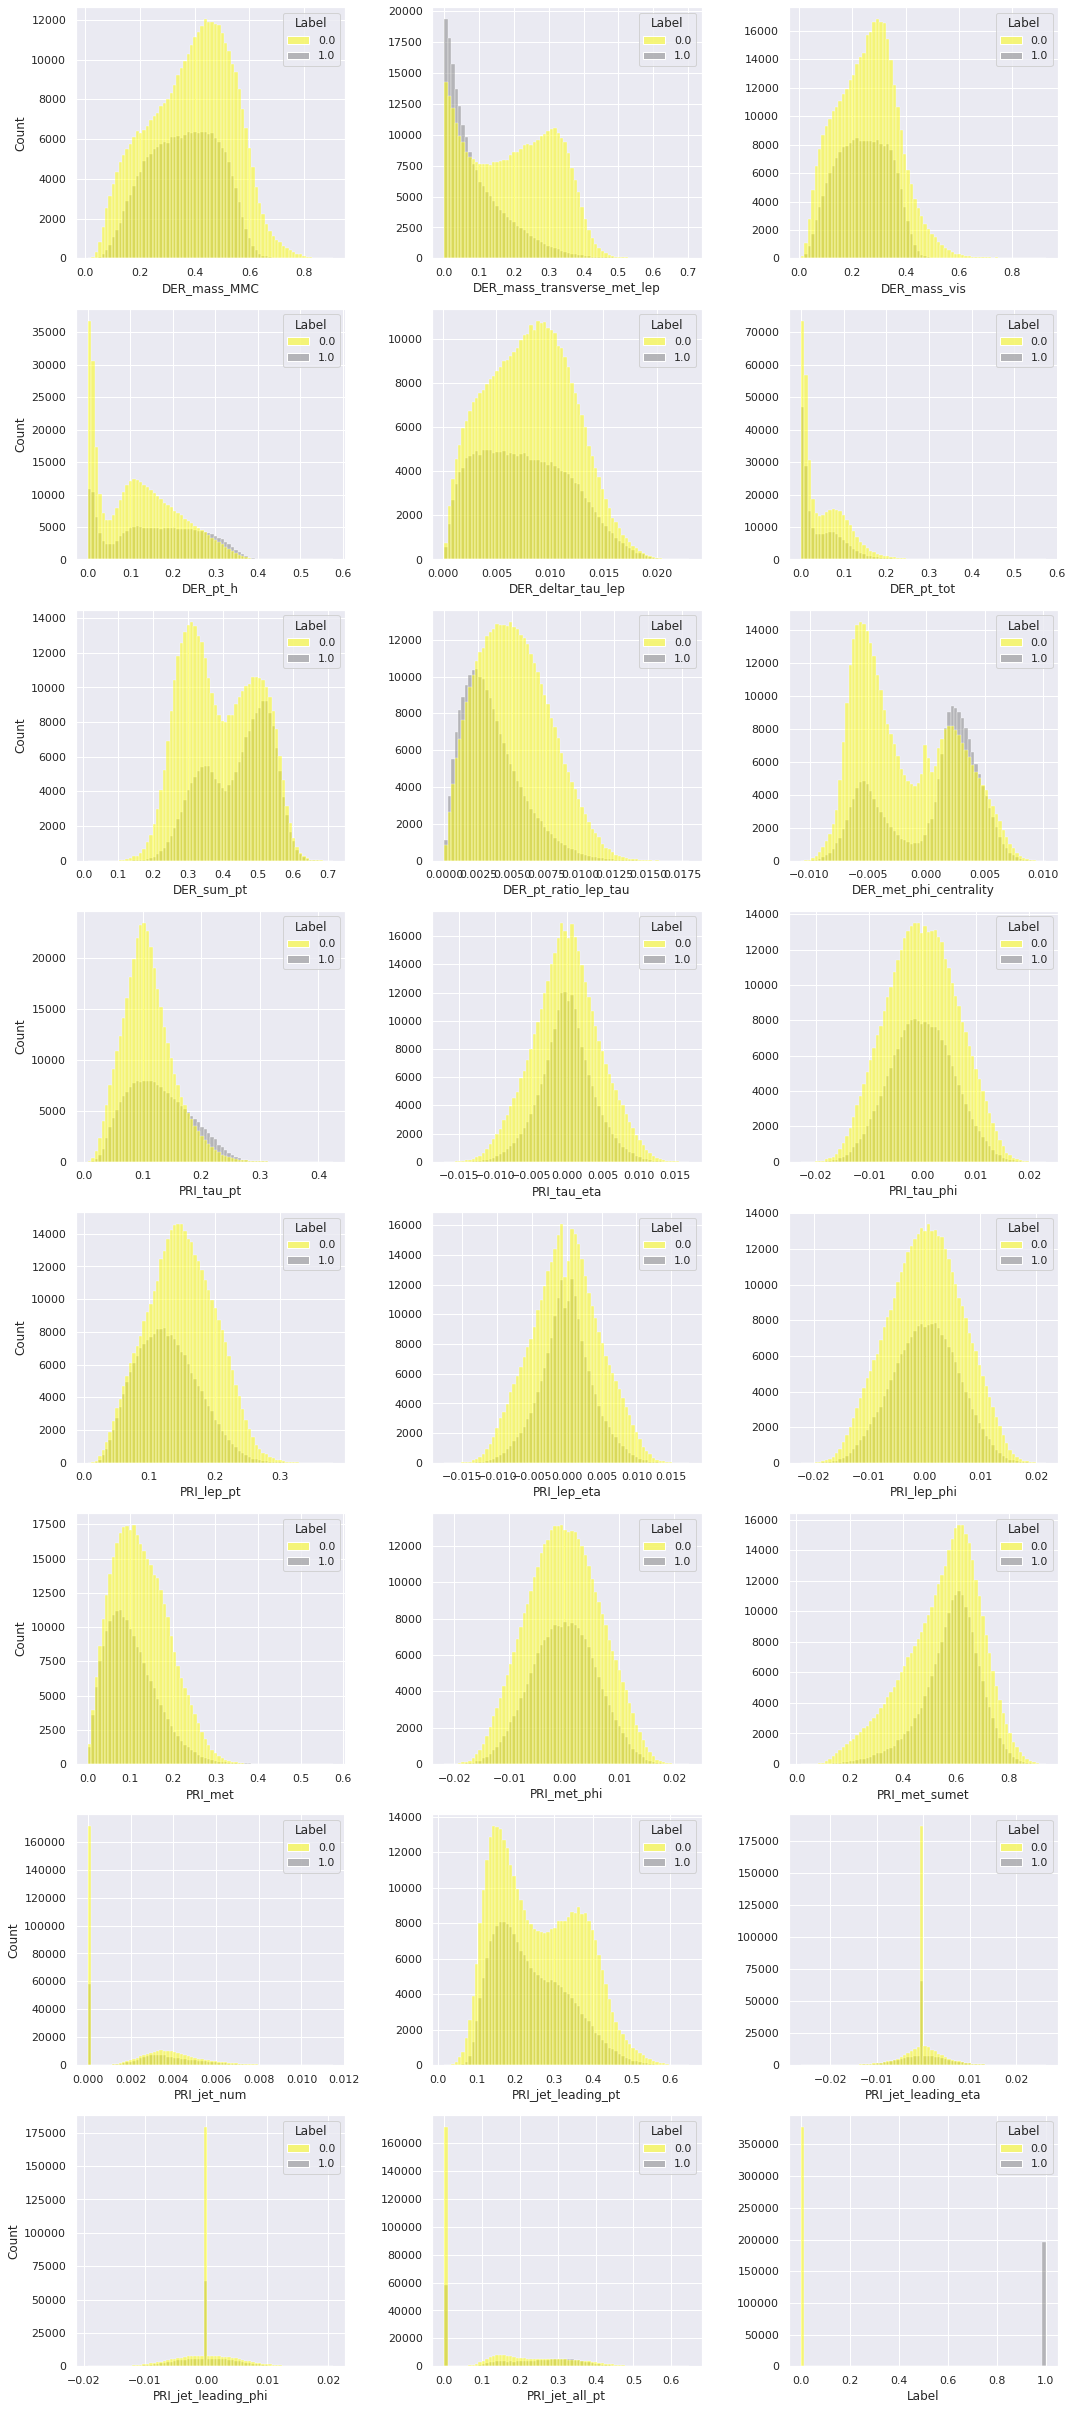

In [ ]:
# Distributions of the float features in the training set by target class
hist_target(X_train_valid,
     list(X_train_valid.columns[X_train_valid.dtypes == 'float64']),
     target = 'Label',
     bins = max(math.floor(len(X_train_valid_b)**(1/3)), math.floor(len(X_train_valid_s)**(1/3))),
     ncols = 3)

### 5.3. Correlation of features

Correlation coefficient is a statistical measure of linear dependence between two variables. Extreme correlation gives an indication that the two variables are linearly related, however this does not prove any causal relationship between the said variables. The measure is defined as the covariance of the two variables, scaled by the product of respective standard deviations.

<AxesSubplot:>

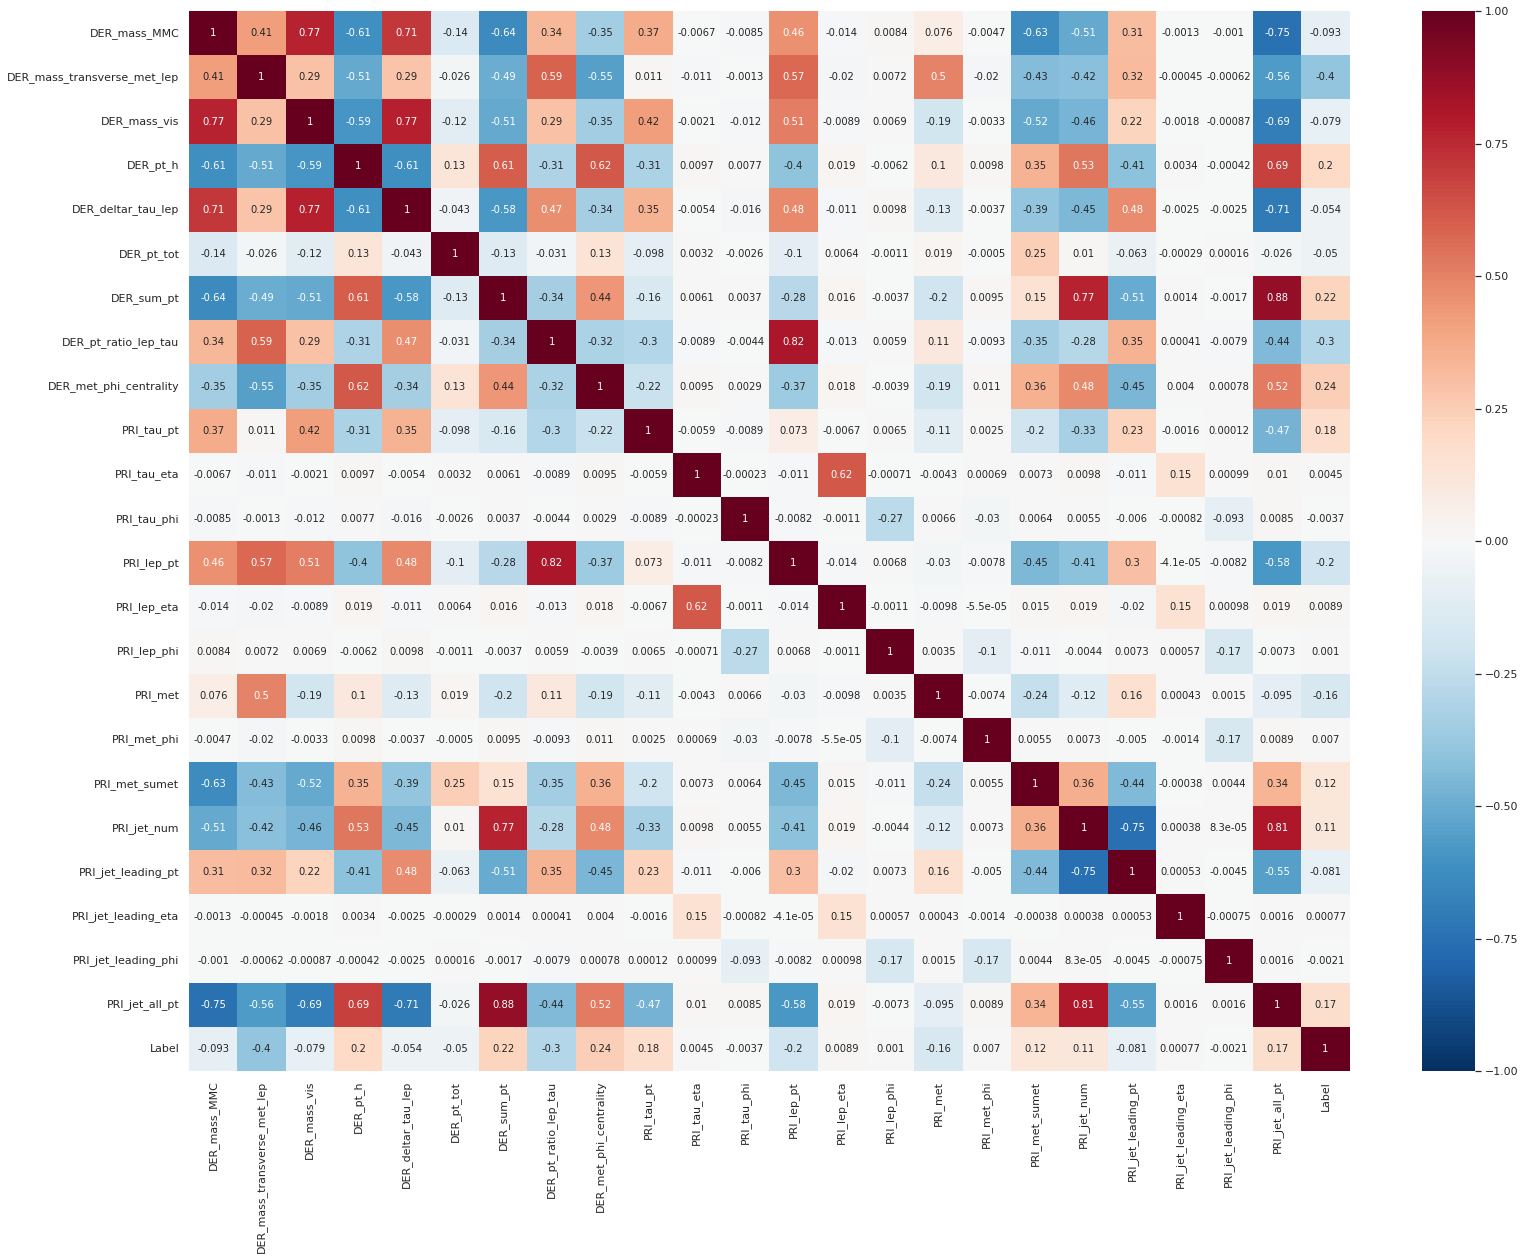

In [ ]:
# Correlation heatmap of float features for the training set
# sns.color_palette("Paired")
plt.figure(figsize = (26, 19.5))
sns.heatmap(X_train_valid.corr(), vmin = -1, vmax = 1, annot = True, cmap=plt.cm.RdBu_r)

**Observation:** The following groups have shown extremely high positive correlation structure within themselves, i.e. any two features from a single group has extremely high correlation coefficient.

- DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_pt, PRI_jet_subleading_eta, PRI_jet_subleading_phi
- DER_sum_pt, PRI_met_sumet, PRI_jet_all_pt
- PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_phi

In [ ]:
# Correlation coefficients of pairs of float features
df_corr = pd.DataFrame(columns = ['feature_1', 'feature_2', 
                                  'Dataset (background events)', 
                                  'Dataset (signal events)', 
                                  'Training set (all events)', 
                                  'Dataset (all events)'])
cols = X_train_valid.columns[X_train_valid.dtypes == 'float64']

for i in range(len(cols)):
    for j in range(len(cols)):
        if i<j:
            df_corr.loc[len(df_corr.index)] = [cols[i], 
                                               cols[j], 
                                               X_train_valid_b[cols[i]].corr(X_train_valid_b[cols[j]]), 
                                               X_train_valid_s[cols[i]].corr(X_train_valid_s[cols[j]]), 
                                               X_train_valid[cols[i]].corr(X_train_valid[cols[j]]), 
                                               X_train_valid[cols[i]].corr(X_train_valid[cols[j]])]
            
df_corr.sort_values(by = 'Dataset (all events)', ascending = False, inplace = True)

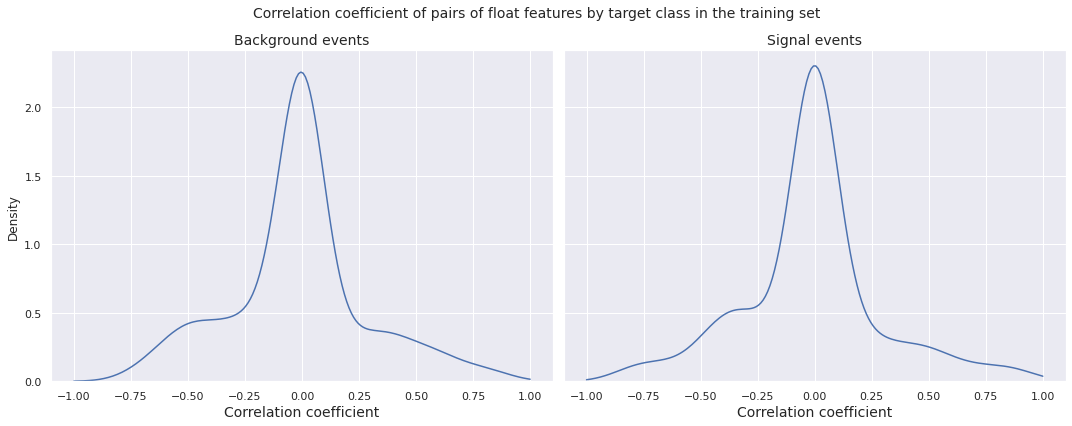

In [ ]:
# Distribution of correlation coefficient of pairs of float features by target class in the training set
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_corr, x = 'Dataset (background events)', clip = (-1.0, 1.0), ax = ax[0])
sns.kdeplot(data = df_corr, x = 'Dataset (signal events)', clip = (-1.0, 1.0), ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Correlation coefficient", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Correlation coefficient", fontsize = 14)
plt.suptitle("Correlation coefficient of pairs of float features by target class in the training set", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The left tail of the correlation distributions corresponding to background events and signal events in the training set are different
- The densities have their respective global peaks near  0, however there is a local peak between  0.5 and  0.6 for both of them, indicating a fair number of pairs of float features with moderate to high positive correlation
- The left tail of the correlation distribution for the signal events is heavier compared to the same for the background events, indicating that there are more pairs of float features with moderate to high negative correlation for the signal events than the background events in the training set
- For both target classes, there is an increase in the density after  0.8, with a small peak very close to  1, indicating the presence of a few pairs of float features with extreme positive correlation

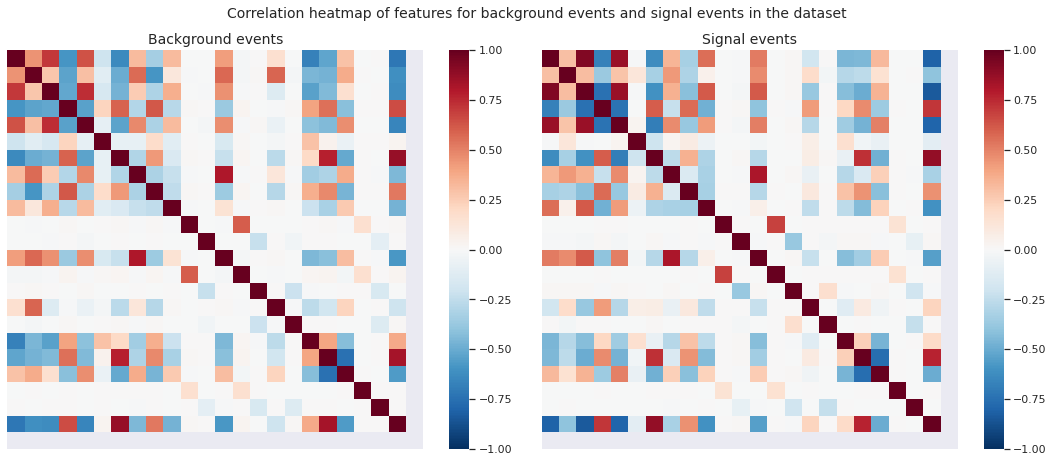

In [ ]:
# Correlation heatmap of features for background events and signal events in the dataset
fig, ax = plt.subplots(1, 2, figsize = (15, 6.5), sharex = True, sharey = True)
sns.heatmap(X_train_valid_b.corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.RdBu_r, ax = ax[0])
sns.heatmap(X_train_valid_s.corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.RdBu_r, ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
plt.suptitle("Correlation heatmap of features for background events and signal events in the dataset", fontsize = 14)
plt.tight_layout()
plt.show()

**Observation:** The two heatmaps are more or less similar, i.e. the overall correlation structure of the float features corresponding to the background events and the signal events in the training set are very much alike.

In the next two subsections, we present bivariate (trivariate) scatterplots for some selected pairs (triples) of features. These plots are given separately for the background events and signal events appearing in the training set. So they can be used not only to understand the relationship between (among) a pair (triple) of features, but also the ability of the pair (triple) to classify an event as **background** (b) or **signal** (s).

## Step 6. Evaluation of several models

In [ ]:
from sklearn.metrics import log_loss, accuracy_score, f1_score

# Remove Label column from X_test used so far in Step 6.
X_test.drop(['Label'], axis=1, inplace=True)

# Function for comparing different models
def score_model(model, X_t, X_v, y_t, y_v):
    model.fit(X_t, y_t)
    y_preds = model.predict(X_v)
    
    log_loss_ = log_loss(y_v, y_preds)
    acc = accuracy_score(y_v, y_preds)
    train_score = model.score(X_t, y_t)
    valid_score = model.score(X_v, y_v)
    f1_score_ = f1_score(y_v, y_preds)
    
    return log_loss_, acc, train_score, valid_score, f1_score_

### Logistic Regression

- The approach used just only for Logistic Regression model represents an experiment is useful to analyze the results usign different model settings.
- Each of these models are trained on one fold and on 3-folds.
- We can see the results below.

#### Part A: Model training

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define models
model_lm_1 = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, random_state=42, solver='liblinear')
model_lm_2 = LogisticRegression(penalty='l2', tol=0.01, C=1.0, random_state=42, solver='liblinear')
model_lm_3 = LogisticRegression(penalty='l2', tol=0.0001, C=10.0, random_state=42, solver='liblinear')
model_lm_4 = LogisticRegression(penalty='l2', tol=0.01, C=10.0, random_state=42, solver='liblinear')

models_lm = [model_lm_1, model_lm_2, model_lm_3, model_lm_4]

**Training models with no folds**

In [ ]:
from sklearn.model_selection import train_test_split

# Break off test set from training and validation sets X and y
train_size = 0.8
valid_size = (1.0 - train_size)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=valid_size, train_size=train_size, random_state=42, shuffle=True)

X_train.drop(['Label'], axis=1, inplace=True)
X_valid.drop(['Label'], axis=1, inplace=True)

print(f"! Breaked off valid set ({valid_size*100})% from training set {(train_size*100)}%.")

! Breaked off valid set (19.999999999999996)% from training set 80.0%.


In [ ]:
%%time
# Comparing different settings of model
models_lm_one_fold = []

for i in range(0, len(models_lm)):
    model = models_lm[i]
    loss, acc, train_score, valid_score, f1_score_ = score_model(model, 
                                                                 X_t=X_train, 
                                                                 X_v=X_valid, 
                                                                 y_t=y_train, 
                                                                 y_v=y_valid)
    models_lm_one_fold.append(model)
    print(f"Model {i+1}: log_loss: {loss} \t acc: {acc} \t train_score: {train_score} \t valid_score: {valid_score} \t f1_score: {f1_score_}")

Model 1: log_loss: 9.552571860376737 	 acc: 0.734972152871135 	 train_score: 0.7367332151929674 	 valid_score: 0.734972152871135 	 f1_score: 0.5755389648519419
Model 2: log_loss: 9.595677998218358 	 acc: 0.7337762103462123 	 train_score: 0.7352622803418505 	 valid_score: 0.7337762103462123 	 f1_score: 0.5721820859928457
Model 3: log_loss: 9.374798372197787 	 acc: 0.7399043245980061 	 train_score: 0.7407444588967552 	 valid_score: 0.7399043245980061 	 f1_score: 0.5853108602764131
Model 4: log_loss: 9.5937901381669 	 acc: 0.7338285873910994 	 train_score: 0.7353102930521244 	 valid_score: 0.7338285873910994 	 f1_score: 0.5724222069526441
CPU times: user 34.2 s, sys: 1.5 s, total: 35.7 s
Wall time: 35.4 s


**Training models with KFolds**

In [ ]:
%%time
# KFold
from sklearn.model_selection import KFold

features = X_train_valid.loc[:, X_train_valid.columns != 'Label'].columns
models_lm_with_kfolds = []

kf3 = KFold(n_splits=3, shuffle=True, random_state=123)

# Train the all models
# Comparing different settings of model
for i in range(0, len(models_lm)):
    kf_no = 1
    model = models_lm[i]
    
    for train_index, valid_index in kf3.split(X_train_valid):
        X_train = X_train_valid.iloc[train_index].loc[:, features]
        X_valid = X_train_valid.iloc[valid_index].loc[:, features]
        y_train = X_train_valid.iloc[train_index].loc[:, 'Label']
        y_valid = X_train_valid.iloc[valid_index].loc[:, 'Label']

        loss, acc, train_score, valid_score, f1_score_ = score_model(model, 
                                                                 X_t=X_train, 
                                                                 X_v=X_valid, 
                                                                 y_t=y_train, 
                                                                 y_v=y_valid)    

        
        print(f"Model {i+1} on fold no. {kf_no}: log_loss: {loss} \t acc: {acc} \t train_score: {train_score} \t valid_score: {valid_score} \t f1_score: {f1_score_}")
            
        kf_no += 1
    
    # Update list with trained model    
    models_lm_with_kfolds.append(model)

Model 1 on fold no. 1: log_loss: 9.474291832962384 	 acc: 0.7371439645509684 	 train_score: 0.7360283257036905 	 valid_score: 0.7371439645509684 	 f1_score: 0.5795880071374119
Model 1 on fold no. 2: log_loss: 9.532249541295938 	 acc: 0.7355359780433894 	 train_score: 0.736745896229874 	 valid_score: 0.7355359780433894 	 f1_score: 0.5763667483303689
Model 1 on fold no. 3: log_loss: 9.499400546996139 	 acc: 0.7364473449890532 	 train_score: 0.7362037900294361 	 valid_score: 0.7364473449890532 	 f1_score: 0.5790486388809878
Model 2 on fold no. 1: log_loss: 9.484297561111172 	 acc: 0.7368663642744158 	 train_score: 0.7359471407171515 	 valid_score: 0.7368663642744158 	 f1_score: 0.5798022717007645
Model 2 on fold no. 2: log_loss: 9.572838815861783 	 acc: 0.7344098637139774 	 train_score: 0.7351955248740323 	 valid_score: 0.7344098637139774 	 f1_score: 0.5730548047858413
Model 2 on fold no. 3: log_loss: 9.500533270937511 	 acc: 0.7364159185426509 	 train_score: 0.7361356993955647 	 valid_sc

#### Part B: Model evaluation

In [ ]:
# Function for comparing different models
def test_model(model, X_t, y_t):
    y_preds = model.predict(X_t)
    log_loss_ = log_loss(y_t, y_preds)
    acc = accuracy_score(y_t, y_preds)
    test_score = model.score(X_t, y_t)
    f1_score_ = f1_score(y_t, y_preds)
    return log_loss_, acc, test_score, f1_score_

In [ ]:
%%time

# Comparing different settings of model
for i in range(0, len(models_lm_with_kfolds)):
    model = models_lm_with_kfolds[i]
    loss, acc, test_score, f1_score_ = test_model(model, X_test, y_test)
    print(f"Model {i+1}: log_loss: {loss} \t acc: {acc} \t test_score: {test_score} \t f1_score: {f1_score_}")

Model 1: log_loss: 9.466979975760738 	 acc: 0.737346825707209 	 test_score: 0.737346825707209 	 f1_score: 0.5781546474044412
Model 2: log_loss: 9.469329320917113 	 acc: 0.7372816451570852 	 test_score: 0.7372816451570852 	 f1_score: 0.5786564570293614
Model 3: log_loss: 9.337912826232342 	 acc: 0.7409276821796376 	 test_score: 0.7409276821796376 	 f1_score: 0.5852436884909119
Model 4: log_loss: 9.467420477977559 	 acc: 0.7373346043540607 	 test_score: 0.7373346043540607 	 f1_score: 0.578975206179845
CPU times: user 1.82 s, sys: 340 ms, total: 2.16 s
Wall time: 2.07 s


#### Observations
Has we can observe there are no significant differences to train models on one-fold or 3-folds. Therefore we'll consider the third model (model_lm_3) trained on 3-fold and stored in models_lm_with_kfolds list.

### Gradient Boosting

In [ ]:
%%time 
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(learning_rate=0.05, 
                                               n_estimators=500, 
                                               subsample=0.3,
                                               random_state=13,
                                               min_samples_leaf=100,
                                               max_depth=3)
#Learning rate shrinks the contribution of each tree by learning_rate
# learning_rate->Values must be in the range [0.0, inf)
#n_estimators -> The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf)

gradient_boosting.fit(X_train, y_train)

#prova: learning_rate=0.05, n_estimators=500, subsample=0.3, random_state=13, min_samples_leaf=100, max_depth=3
#prova: learning_rate=0.05, n_estimators=500, subsample=0.3, random_state=13, min_samples_leaf=50, max_depth=8

CPU times: user 15min 19s, sys: 936 ms, total: 15min 20s
Wall time: 15min 24s


GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=100,
                           n_estimators=500, random_state=13, subsample=0.3)

### Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

CPU times: user 6min 37s, sys: 713 ms, total: 6min 38s
Wall time: 6min 39s


RandomForestClassifier()

### Decision Tree

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion='entropy',
                                           max_depth=None,
                                           splitter='best',
                                           random_state=10)

decision_tree_model.fit(X_train,y_train)

CPU times: user 39.5 s, sys: 37.8 ms, total: 39.5 s
Wall time: 39.7 s


DecisionTreeClassifier(criterion='entropy', random_state=10)

### KNeighbors

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_model = KNeighborsClassifier(n_neighbors=7,
                                       weights='distance',
                                       algorithm='brute')

k_neighbors_model.fit(X_train,y_train)

CPU times: user 61.6 ms, sys: 30 ms, total: 91.5 ms
Wall time: 90.7 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')

### BernoulliNB

In [ ]:
%%time
from sklearn.naive_bayes import BernoulliNB

bernoulli_nb_model = BernoulliNB(alpha=0.1)
bernoulli_nb_model.fit(X_train,y_train)

CPU times: user 284 ms, sys: 36.8 ms, total: 321 ms
Wall time: 304 ms


BernoulliNB(alpha=0.1)

### GaussianNB

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB

gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train,y_train)

CPU times: user 193 ms, sys: 78.9 ms, total: 272 ms
Wall time: 231 ms


GaussianNB()

### XGBClassifier

In [ ]:
%%time
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

CPU times: user 7min 6s, sys: 821 ms, total: 7min 7s
Wall time: 4min 20s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
%%time
models = [models_lm_with_kfolds[2], gradient_boosting, random_forest, decision_tree_model, k_neighbors_model, bernoulli_nb_model, gaussian_nb_model, xgb_classifier]

for model in models:
    print(f"{type(model).__name__} \t train_score \t : \t {model.score(X_train, y_train)}")
    print(f"{type(model).__name__} \t test_score \t : \t {model.score(X_test, y_test)}")
       
    y_preds = model.predict(X_test)
    
    print(f"{type(model).__name__} \t f1_score \t : \t {f1_score(y_test, y_preds)}")
    print('--------------------------------------------------------------------------')

LogisticRegression 	 train_score 	 : 	 0.7403154167670567
LogisticRegression 	 test_score 	 : 	 0.7409276821796376
LogisticRegression 	 f1_score 	 : 	 0.5852436884909119
--------------------------------------------------------------------------
GradientBoostingClassifier 	 train_score 	 : 	 0.8041477671509831
GradientBoostingClassifier 	 test_score 	 : 	 0.802042595489506
GradientBoostingClassifier 	 f1_score 	 : 	 0.6966179895236965
--------------------------------------------------------------------------
RandomForestClassifier 	 train_score 	 : 	 0.9999711924241313
RandomForestClassifier 	 test_score 	 : 	 0.8228962977447529
RandomForestClassifier 	 f1_score 	 : 	 0.7224733159695623
--------------------------------------------------------------------------
DecisionTreeClassifier 	 train_score 	 : 	 1.0
DecisionTreeClassifier 	 test_score 	 : 	 0.7442844805110155
DecisionTreeClassifier 	 f1_score 	 : 	 0.6263386293150148
---------------------------------------------------------------

### ANN Model

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import InputLayer
from keras.callbacks import EarlyStopping
# import keras_tuner as kt

In [ ]:
auc_roc_metric = tf.keras.metrics.AUC(curve='ROC')
precision_metric = tf.keras.metrics.Precision()

# Neural network
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=[precision_metric, auc_roc_metric])

In [ ]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
  321/11933 [..............................] - ETA: 31s - loss: 0.5756 - precision: 0.5880 - auc: 0.7207

In [ ]:
# Plotting Loss vs epochs graph, Accuaracy vs epochs graph
def plot_loss_accuracy(history, epochs):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = np.linspace(1, epochs, epochs)
    epochs

    fig = go.Figure(data=go.Scatter(x=epochs, y=loss, name='loss'))
    fig.add_trace( go.Scatter(x=epochs, y=val_loss, name='val_loss') )
    fig.update_layout(title="Loss", xaxis_title='epochs')
    fig.show()

In [ ]:
plot_loss_accuracy(history, epochs=10)

## References


(1)=
https://higgsml.ijclab.in2p3.fr/documentation/